# Pandas Highlevel

Pandas is a python module that is powerful to handle data science tasks.




## What is Pandas

* Pandas is a Python package 
* It is **fast, flexible, and expressive**
* Designed to make working with **“relational”** or **“labeled” data** both easy and intuitive. 

**Goals:** (based on pandas official website)
* to be the fundamental high-level building block for doing practical, real world data analysis in Python. 
* to become the most powerful and flexible open source data analysis / manipulation tool available in any language. 
  

pandas is suited for the following kinds of data:

* **Tabular data**
  * **with heterogeneously-typed columns**, as in an SQL table or Excel spreadsheet
* **Time series data**
  * **Ordered and unordered (not necessarily fixed-frequency) time series data**.
* **Matrix data**
  * Arbitrary **matrix data (homogeneously typed or heterogeneous) with row and column labels**
* **Observational / statistical data sets**
  * Any other form of **observational / statistical data sets**. 
  * The data actually need not be labeled at all to be placed into a pandas data structure

## The core concepts of Pandas
Pandas is a large and complicated package with many features and function APIs.

The essence of Pandas: (1) data structures (2) index (3) reshape (4) high level funtions:
* Data structures
  * Series and dataFrame
* Index
  * Powerful functions based index and Multi-index
* Reshape
  * Dataframe reshape based on index
* High level functions
  * High level function support, such as 
    * Missing data
    * Stats and window functions
    * Group by
    * TIme series
    * Plot

### Primart Data Structures

The two primary data structures of pandas:
* **Series (1-dimensional)** 
* **DataFrame (2-dimensional)**

Handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 

* For R users, DataFrame provides everything that R’s data.frame provides and much more. 
* pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.


#### Mutability and copying of data
All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.

#### Pandas data structures

Dimensions | Name | Description
---|---|---
1 | Series | 1D labeled homogeniously-typed array, size-immutable
2 | DataFrame | 2D, labeled, size-mutable tabular structure, with potentially heterogeneously-typed column

## Quick look into pandas coding

a short introduction to pandas

## Create Series and DataFrames

In [1]:
import numpy as np
import pandas as pd

# Creating a Series by passing a list of values, 
# letting pandas create a default integer index
s = pd.Series([1, 3, 5, np.nan, 6, 8])

print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
# Creating a DataFrame

# first create an pandas index
dates = pd.date_range('20191002', periods=8)
print(dates)

# create a data frame by supplying:
# 1. the data 
# 2. an index 
# 3. a list of column labels
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=list('ABST'))
print(df)

DatetimeIndex(['2019-10-02', '2019-10-03', '2019-10-04', '2019-10-05',
               '2019-10-06', '2019-10-07', '2019-10-08', '2019-10-09'],
              dtype='datetime64[ns]', freq='D')
                   A         B         S         T
2019-10-02  0.777138 -0.267269  0.119741 -0.020885
2019-10-03  0.385544  0.322240  0.720011 -0.065756
2019-10-04  1.544209 -0.333866 -0.084708  1.507389
2019-10-05  0.549199  0.941824 -0.283344 -0.539447
2019-10-06  1.222607  0.662078  0.175813  1.088437
2019-10-07  0.100213  0.667455 -1.890335  0.535583
2019-10-08 -0.905007  0.523236 -0.809862  1.182063
2019-10-09 -1.603967  1.480507 -0.891274 -0.419382


In [4]:
import numpy as np
import pandas as pd

# Creating a DataFrame by passing:
#     a dictionary of objects.
#     Each entry in the dictionary describes a column.

# Note: Because columne 'C' has an index, that index is used as the index of the dataFrame

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(2, 8)), dtype='float32'),
                    'D': np.array([3] * 6, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train", "test", "train"]),
                    'F': 'foo'})

print("The content of df2 is:-----------\n", df2)

print("\nThe data types of the columns of df2 are:--------\n",df2.dtypes)

The content of df2 is:-----------
      A          B    C  D      E    F
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
4  1.0 2013-01-02  1.0  3   test  foo
5  1.0 2013-01-02  1.0  3  train  foo
6  1.0 2013-01-02  1.0  3   test  foo
7  1.0 2013-01-02  1.0  3  train  foo

The data types of the columns of df2 are:--------
 A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


### Viewing data

In practice, pandas usually deals with very large data.  Often we want to get a feeling of the dataset, but we don't want to print out the whole dataset, because it would be too big.  

We can use the following functions to explore the dataset:
* dataframe.head(): view the top rows of data
* dataframe.tail(): view the bottom rows of data 
* dataframe.index attribute: describe the index
* dataframe.columns attribute: descrube the column names and type.

In [5]:
print(df2.head())   # return the first few rows (default is usually 5 rows)

print("\n", df2.head(3))   # return the first three rows

print("\n", df2.tail())  # return the last few rows (default is usually 5)

print("\n", df2.tail(2))  # return the last 2 rows

     A          B    C  D      E    F
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
4  1.0 2013-01-02  1.0  3   test  foo
5  1.0 2013-01-02  1.0  3  train  foo
6  1.0 2013-01-02  1.0  3   test  foo

      A          B    C  D      E    F
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
4  1.0 2013-01-02  1.0  3   test  foo

      A          B    C  D      E    F
3  1.0 2013-01-02  1.0  3  train  foo
4  1.0 2013-01-02  1.0  3   test  foo
5  1.0 2013-01-02  1.0  3  train  foo
6  1.0 2013-01-02  1.0  3   test  foo
7  1.0 2013-01-02  1.0  3  train  foo

      A          B    C  D      E    F
6  1.0 2013-01-02  1.0  3   test  foo
7  1.0 2013-01-02  1.0  3  train  foo


In [6]:
# view the index
print("The index of df2 is:", df2.index)

# view the column names
print("The columns of df2 are:", df2.columns)

The index of df2 is: Int64Index([2, 3, 4, 5, 6, 7], dtype='int64')
The columns of df2 are: Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


#### Converting Pandas data to NumPy

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that his can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

**Note** DataFrame.to_numpy() does not include the index or column labels in the output.

In [0]:
### Converting Pandas data to numpy
#to_numpy() is supported only on Pandas 0.24.2 and later.  It is not supported on 0.22.0 and before
df2.to_numpy()








array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

#### Statistics
You can find out the basic statistics of your data using describe()



In [7]:
# Statistics
print(df.describe())


              A         B         S         T
count  8.000000  8.000000  8.000000  8.000000
mean   0.258742  0.499526 -0.367995  0.408500
std    1.055581  0.600843  0.809883  0.781729
min   -1.603967 -0.333866 -1.890335 -0.539447
25%   -0.151092  0.174863 -0.830215 -0.154162
50%    0.467372  0.592657 -0.184026  0.257349
75%    0.888505  0.736048  0.133759  1.111843
max    1.544209  1.480507  0.720011  1.507389


In [0]:
# Transpose

print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    0.000000   -1.156894    0.328778   -0.447283    0.616268   -0.756414
B    0.000000   -0.342540    0.385815   -0.004269    1.219283    0.369195
C    0.590937   -0.457856   -0.274591    2.525190   -0.313061    1.074602
D    5.000000    5.000000    5.000000    5.000000    5.000000    5.000000
F         NaN    1.000000    2.000000    3.000000    4.000000    5.000000


In [18]:
# Sort data by an axis
# In this example, we sort by Y-axis in descending order

df.sort_index(axis=0, ascending=False)   


,A,B,S,T
2019-10-09,-1.603967,1.480507,-0.891274,-0.419382
2019-10-08,-0.905007,0.523236,-0.809862,1.182063
2019-10-07,0.100213,0.667455,-1.890335,0.535583
2019-10-06,1.222607,0.662078,0.175813,1.088437
2019-10-05,0.549199,0.941824,-0.283344,-0.539447
2019-10-04,1.544209,-0.333866,-0.084708,1.507389
2019-10-03,0.385544,0.322240,0.720011,-0.065756
2019-10-02,0.777138,-0.267269,0.119741,-0.020885


In [20]:
# Sort by values of certain column
df.sort_values(by='S')   # In this example, we sort by the values of column B

,A,B,S,T
2019-10-07,0.100213,0.667455,-1.890335,0.535583
2019-10-09,-1.603967,1.480507,-0.891274,-0.419382
2019-10-08,-0.905007,0.523236,-0.809862,1.182063
2019-10-05,0.549199,0.941824,-0.283344,-0.539447
2019-10-04,1.544209,-0.333866,-0.084708,1.507389
2019-10-02,0.777138,-0.267269,0.119741,-0.020885
2019-10-06,1.222607,0.662078,0.175813,1.088437
2019-10-03,0.385544,0.322240,0.720011,-0.065756


### Select a subset from the data

#### Select by [ ]

In [22]:
# select a subset of columns
df['S']

2019-10-02    0.119741
2019-10-03    0.720011
2019-10-04   -0.084708
2019-10-05   -0.283344
2019-10-06    0.175813
2019-10-07   -1.890335
2019-10-08   -0.809862
2019-10-09   -0.891274
Freq: D, Name: S, dtype: float64

In [24]:
df.B

2019-10-02   -0.267269
2019-10-03    0.322240
2019-10-04   -0.333866
2019-10-05    0.941824
2019-10-06    0.662078
2019-10-07    0.667455
2019-10-08    0.523236
2019-10-09    1.480507
Freq: D, Name: B, dtype: float64

In [26]:
# select a subset of rows by row count numbers
df[1:5]

,A,B,S,T
2019-10-03,0.385544,0.322240,0.720011,-0.065756
2019-10-04,1.544209,-0.333866,-0.084708,1.507389
2019-10-05,0.549199,0.941824,-0.283344,-0.539447
2019-10-06,1.222607,0.662078,0.175813,1.088437


In [27]:
# select by index (more useful in real applications)
df['20191003':'20191006']

,A,B,S,T
2019-10-03,0.385544,0.322240,0.720011,-0.065756
2019-10-04,1.544209,-0.333866,-0.084708,1.507389
2019-10-05,0.549199,0.941824,-0.283344,-0.539447
2019-10-06,1.222607,0.662078,0.175813,1.088437


#### Select by labels

Select rows by labels

In [28]:
# Select one row
print(df.loc[dates[0]])

# select two rows
print('-------------')
print(df.loc[dates[1:3]])

# select two noncontiguous rows
print('-------------')
print( df.loc[ (dates[1], dates[3]), ])

A    0.777138
B   -0.267269
S    0.119741
T   -0.020885
Name: 2019-10-02 00:00:00, dtype: float64
-------------
                   A         B         S         T
2019-10-03  0.385544  0.322240  0.720011 -0.065756
2019-10-04  1.544209 -0.333866 -0.084708  1.507389
-------------
                   A         B         S         T
2019-10-03  0.385544  0.322240  0.720011 -0.065756
2019-10-05  0.549199  0.941824 -0.283344 -0.539447


Select columns by lables

In [29]:
df.loc[:,['A','S']]

,A,S
2019-10-02,0.777138,0.119741
2019-10-03,0.385544,0.720011
2019-10-04,1.544209,-0.084708
2019-10-05,0.549199,-0.283344
2019-10-06,1.222607,0.175813
2019-10-07,0.100213,-1.890335
2019-10-08,-0.905007,-0.809862
2019-10-09,-1.603967,-0.891274


In [31]:
# Select part of rows and part of columns
df.loc['20191002':'20191004', ['A', 'B']]

,A,B
2019-10-02,0.777138,-0.267269
2019-10-03,0.385544,0.322240
2019-10-04,1.544209,-0.333866


In [0]:
# Reducing the dimension of return data
# getting a 1 dimensional data
df.loc['20130102', ['A', 'B']]

A   -1.156894
B   -0.342540
Name: 2013-01-02 00:00:00, dtype: float64

In [0]:
# Getting a 0 dimensional data (scalar)
# The following two operations have the same effect, but the 2nd one is faster
print(df.loc[dates[0], 'A'])
print(df.at[dates[0], 'A'])


0.0
0.0


#### Select by locations

You can select data based on the location of the cells in the DataFrame, using the **DataFrame.iloc\[ ]** mechanism.

You can also select a single cell using the **DataFrame.iat\[ ]** mechanism, which is faster than DataFrame.iloc\[ ].

In [33]:
# Select by specifying the positions
df.iloc[3]
df.iloc[3:5, 0:2]
print(df.iloc[[1, 2, 4], [0, 2]])
df.iloc[1:3, :]
df.iloc[:, 1:3]

                   A         S
2019-10-03  0.385544  0.720011
2019-10-04  1.544209 -0.084708
2019-10-06  1.222607  0.175813


,B,S
2019-10-02,-0.267269,0.119741
2019-10-03,0.322240,0.720011
2019-10-04,-0.333866,-0.084708
2019-10-05,0.941824,-0.283344
2019-10-06,0.662078,0.175813
2019-10-07,0.667455,-1.890335
2019-10-08,0.523236,-0.809862
2019-10-09,1.480507,-0.891274


In [0]:
# Specify a single value by position
# The following two operations have the same effect, but the 2nd one is faster
df.iloc[1, 1]
df.iat[1, 1]


#### Selection by condition (Boolean indexing)

Selection by condition works on DataFrame\[ ] itself, and work on DataFrame.loc\[ ]

In [36]:
# Select all rows whose column A value > 0
print(df[df.A > 1.0])
print(df.loc[df.A > 0.5])
print(df.loc[df['A'] >0])

                   A         B         S         T
2019-10-04  1.544209 -0.333866 -0.084708  1.507389
2019-10-06  1.222607  0.662078  0.175813  1.088437
                   A         B         S         T
2019-10-02  0.777138 -0.267269  0.119741 -0.020885
2019-10-04  1.544209 -0.333866 -0.084708  1.507389
2019-10-05  0.549199  0.941824 -0.283344 -0.539447
2019-10-06  1.222607  0.662078  0.175813  1.088437
                   A         B         S         T
2019-10-02  0.777138 -0.267269  0.119741 -0.020885
2019-10-03  0.385544  0.322240  0.720011 -0.065756
2019-10-04  1.544209 -0.333866 -0.084708  1.507389
2019-10-05  0.549199  0.941824 -0.283344 -0.539447
2019-10-06  1.222607  0.662078  0.175813  1.088437
2019-10-07  0.100213  0.667455 -1.890335  0.535583


In [37]:
# Display all cells whose value > 0
# This trick has no DataFrame.loc[] correspondence.
print(df[df > 0])




                   A         B         S         T
2019-10-02  0.777138       NaN  0.119741       NaN
2019-10-03  0.385544  0.322240  0.720011       NaN
2019-10-04  1.544209       NaN       NaN  1.507389
2019-10-05  0.549199  0.941824       NaN       NaN
2019-10-06  1.222607  0.662078  0.175813  1.088437
2019-10-07  0.100213  0.667455       NaN  0.535583
2019-10-08       NaN  0.523236       NaN  1.182063
2019-10-09       NaN  1.480507       NaN       NaN


In [40]:
# Select by set membership with isin()
df2 = df.copy()

# Add an new column
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','four','one']
print(df2)

# isin() generate logical conditions
print( df2['E'].isin(['two', 'four' ]) )

# Select the rows whose column E is either 'two' or 'four'
print(df2[ df2['E'].isin(['two', 'four' ])])

                   A         B         S         T      E
2019-10-02  0.777138 -0.267269  0.119741 -0.020885    one
2019-10-03  0.385544  0.322240  0.720011 -0.065756    one
2019-10-04  1.544209 -0.333866 -0.084708  1.507389    two
2019-10-05  0.549199  0.941824 -0.283344 -0.539447  three
2019-10-06  1.222607  0.662078  0.175813  1.088437   four
2019-10-07  0.100213  0.667455 -1.890335  0.535583  three
2019-10-08 -0.905007  0.523236 -0.809862  1.182063   four
2019-10-09 -1.603967  1.480507 -0.891274 -0.419382    one
2019-10-02    False
2019-10-03    False
2019-10-04     True
2019-10-05    False
2019-10-06     True
2019-10-07    False
2019-10-08     True
2019-10-09    False
Freq: D, Name: E, dtype: bool
                   A         B         S         T     E
2019-10-04  1.544209 -0.333866 -0.084708  1.507389   two
2019-10-06  1.222607  0.662078  0.175813  1.088437  four
2019-10-08 -0.905007  0.523236 -0.809862  1.182063  four


## Setting values

In [41]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

print(s1)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64


In [42]:
# add a new column to df
df['F'] = s1

# note that the indices are not fully aligned
# This is the correct thing to do for the data
print(df)

                   A         B         S         T   F
2019-10-02  0.777138 -0.267269  0.119741 -0.020885 NaN
2019-10-03  0.385544  0.322240  0.720011 -0.065756 NaN
2019-10-04  1.544209 -0.333866 -0.084708  1.507389 NaN
2019-10-05  0.549199  0.941824 -0.283344 -0.539447 NaN
2019-10-06  1.222607  0.662078  0.175813  1.088437 NaN
2019-10-07  0.100213  0.667455 -1.890335  0.535583 NaN
2019-10-08 -0.905007  0.523236 -0.809862  1.182063 NaN
2019-10-09 -1.603967  1.480507 -0.891274 -0.419382 NaN


In [43]:
# set value by label
df.at[dates[0], 'A'] = 0

# set value by position
df.iat[0, 1] = 0

# set values for the whole column
df.loc[:, 'D'] = np.array([5] * len(df))

print(df)

                   A         B         S         T   F  D
2019-10-02  0.000000  0.000000  0.119741 -0.020885 NaN  5
2019-10-03  0.385544  0.322240  0.720011 -0.065756 NaN  5
2019-10-04  1.544209 -0.333866 -0.084708  1.507389 NaN  5
2019-10-05  0.549199  0.941824 -0.283344 -0.539447 NaN  5
2019-10-06  1.222607  0.662078  0.175813  1.088437 NaN  5
2019-10-07  0.100213  0.667455 -1.890335  0.535583 NaN  5
2019-10-08 -0.905007  0.523236 -0.809862  1.182063 NaN  5
2019-10-09 -1.603967  1.480507 -0.891274 -0.419382 NaN  5


In [44]:
# set value for all cells with certain condition
df2 = df.copy()  # make a copy so that we won't change the original data

# print(df2 > 0)

# Setting by condition (boolean array)
df2[df2 > 0] = -df2

print(df2)


                   A         B         S         T   F  D
2019-10-02  0.000000  0.000000 -0.119741 -0.020885 NaN -5
2019-10-03 -0.385544 -0.322240 -0.720011 -0.065756 NaN -5
2019-10-04 -1.544209 -0.333866 -0.084708 -1.507389 NaN -5
2019-10-05 -0.549199 -0.941824 -0.283344 -0.539447 NaN -5
2019-10-06 -1.222607 -0.662078 -0.175813 -1.088437 NaN -5
2019-10-07 -0.100213 -0.667455 -1.890335 -0.535583 NaN -5
2019-10-08 -0.905007 -0.523236 -0.809862 -1.182063 NaN -5
2019-10-09 -1.603967 -1.480507 -0.891274 -0.419382 NaN -5


### Handling missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

DataFrame.reindex() below creates a new dataFrame.

In [47]:

# Make a new dataframe from the original data frame.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

# column 'E' are np.nan at this point
print(df1)

df1.loc[dates[0]:dates[1], 'E'] = 1
df1.loc[dates[0]:dates[1], 'F'] = 3
print(df1)


                   A         B         S         T   F  D   E
2019-10-02  0.000000  0.000000  0.119741 -0.020885 NaN  5 NaN
2019-10-03  0.385544  0.322240  0.720011 -0.065756 NaN  5 NaN
2019-10-04  1.544209 -0.333866 -0.084708  1.507389 NaN  5 NaN
2019-10-05  0.549199  0.941824 -0.283344 -0.539447 NaN  5 NaN
                   A         B         S         T    F  D    E
2019-10-02  0.000000  0.000000  0.119741 -0.020885  3.0  5  1.0
2019-10-03  0.385544  0.322240  0.720011 -0.065756  3.0  5  1.0
2019-10-04  1.544209 -0.333866 -0.084708  1.507389  NaN  5  NaN
2019-10-05  0.549199  0.941824 -0.283344 -0.539447  NaN  5  NaN


In data analaysis, we sometimes want to drop rows with missing data.



In [48]:
print( df1.dropna(how='any'))

                   A        B         S         T    F  D    E
2019-10-02  0.000000  0.00000  0.119741 -0.020885  3.0  5  1.0
2019-10-03  0.385544  0.32224  0.720011 -0.065756  3.0  5  1.0


Sometime we want to fill the missing data with some values.


In [50]:
print(df1.fillna(value=3))

                   A         B         S         T    F  D    E
2019-10-02  0.000000  0.000000  0.119741 -0.020885  3.0  5  1.0
2019-10-03  0.385544  0.322240  0.720011 -0.065756  3.0  5  1.0
2019-10-04  1.544209 -0.333866 -0.084708  1.507389  3.0  5  3.0
2019-10-05  0.549199  0.941824 -0.283344 -0.539447  3.0  5  3.0


We can also get a boolean mask of the data frame where the data are NaN.

In [51]:
print(pd.isna(df1))

                A      B      S      T      F      D      E
2019-10-02  False  False  False  False  False  False  False
2019-10-03  False  False  False  False  False  False  False
2019-10-04  False  False  False  False   True  False   True
2019-10-05  False  False  False  False   True  False   True


## Operations

Operations in general exclude missing data.



### Stats
Pandas supports the following stat operations:
* mean()

In [53]:
print(df.mean()) # take mean on each column (along axis 0) 
print(df.mean(1)) # take mean on each row (along axis 1)

A    0.161600
B    0.532934
S   -0.367995
T    0.408500
F         NaN
D    5.000000
dtype: float64
2019-10-02    1.019771
2019-10-03    1.272408
2019-10-04    1.526605
2019-10-05    1.133647
2019-10-06    1.629787
2019-10-07    0.882583
2019-10-08    0.998086
2019-10-09    0.713177
Freq: D, dtype: float64


### Arithmetic operations
Pandas supports arithmetic operations.  
It automatically handles broadcasting, and deals with missing data.



In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 7, 9], index=dates)
print(s)

s = pd.Series([1, 3, 5, np.nan, 6, 8, 7, 9], index=dates).shift(2)
print(s)

2019-10-02    1.0
2019-10-03    3.0
2019-10-04    5.0
2019-10-05    NaN
2019-10-06    6.0
2019-10-07    8.0
2019-10-08    7.0
2019-10-09    9.0
Freq: D, dtype: float64
2019-10-02    NaN
2019-10-03    NaN
2019-10-04    1.0
2019-10-05    3.0
2019-10-06    5.0
2019-10-07    NaN
2019-10-08    6.0
2019-10-09    8.0
Freq: D, dtype: float64


In [56]:
# DataFrame automatically do broadcasting on operations
print(df)
print(df.sub(s, axis='index'))

                   A         B         S         T   F  D
2019-10-02  0.000000  0.000000  0.119741 -0.020885 NaN  5
2019-10-03  0.385544  0.322240  0.720011 -0.065756 NaN  5
2019-10-04  1.544209 -0.333866 -0.084708  1.507389 NaN  5
2019-10-05  0.549199  0.941824 -0.283344 -0.539447 NaN  5
2019-10-06  1.222607  0.662078  0.175813  1.088437 NaN  5
2019-10-07  0.100213  0.667455 -1.890335  0.535583 NaN  5
2019-10-08 -0.905007  0.523236 -0.809862  1.182063 NaN  5
2019-10-09 -1.603967  1.480507 -0.891274 -0.419382 NaN  5
                   A         B         S         T   F    D
2019-10-02       NaN       NaN       NaN       NaN NaN  NaN
2019-10-03       NaN       NaN       NaN       NaN NaN  NaN
2019-10-04  0.544209 -1.333866 -1.084708  0.507389 NaN  4.0
2019-10-05 -2.450801 -2.058176 -3.283344 -3.539447 NaN  2.0
2019-10-06 -3.777393 -4.337922 -4.824187 -3.911563 NaN  0.0
2019-10-07       NaN       NaN       NaN       NaN NaN  NaN
2019-10-08 -6.905007 -5.476764 -6.809862 -4.817937 NaN -1.

### Apply functions to data

In data science, you often need to apply a function of your own design to all the data cells.  

Pandas supports this with the DataFrame.apply() function.

In [57]:
print(df)

# apply the NumPy cumulative sum function.
print(df.apply(np.cumsum))

df1 = df.apply( lambda x: x.max() - x.min())
print(df1)

                   A         B         S         T   F  D
2019-10-02  0.000000  0.000000  0.119741 -0.020885 NaN  5
2019-10-03  0.385544  0.322240  0.720011 -0.065756 NaN  5
2019-10-04  1.544209 -0.333866 -0.084708  1.507389 NaN  5
2019-10-05  0.549199  0.941824 -0.283344 -0.539447 NaN  5
2019-10-06  1.222607  0.662078  0.175813  1.088437 NaN  5
2019-10-07  0.100213  0.667455 -1.890335  0.535583 NaN  5
2019-10-08 -0.905007  0.523236 -0.809862  1.182063 NaN  5
2019-10-09 -1.603967  1.480507 -0.891274 -0.419382 NaN  5
                   A         B         S         T   F   D
2019-10-02  0.000000  0.000000  0.119741 -0.020885 NaN   5
2019-10-03  0.385544  0.322240  0.839753 -0.086641 NaN  10
2019-10-04  1.929753 -0.011626  0.755044  1.420748 NaN  15
2019-10-05  2.478952  0.930198  0.471701  0.881301 NaN  20
2019-10-06  3.701559  1.592276  0.647513  1.969738 NaN  25
2019-10-07  3.801771  2.259731 -1.242822  2.505321 NaN  30
2019-10-08  2.896764  2.782967 -2.052683  3.687384 NaN  35
2019-1

### Histogram

series.value_counts() returns a series which is the histogram of the original series data.

In [62]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())


0    2
1    1
2    4
3    4
4    5
5    0
6    5
7    2
8    0
9    5
dtype: int64
5    3
4    2
2    2
0    2
1    1
dtype: int64


### Merge data

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

The main types of merging data include:
* Concatenate
* Join: SQL style join.
* Append: add new rows to a dataframe


In [63]:
# Concat
df = pd.DataFrame(np.random.randn(10, 4))
print(df)

# break it into pieces
pieces = [ df[:3], df[7:]]
print(pd.concat(pieces))


          0         1         2         3
0  0.917648 -0.581949  1.054364 -0.049878
1 -0.846487  0.036553  1.934288  1.402316
2 -0.095928 -0.224537  0.774326 -0.751974
3  0.390377 -0.078754 -1.457869 -0.031633
4  1.088702  0.498400  1.015861 -0.034654
5 -0.678487 -0.577477  0.232106  0.161510
6 -0.731839  0.141353 -2.123256  1.529921
7 -1.830209 -0.668499  2.636951 -1.705641
8  2.448841  0.189666 -0.276640 -0.283198
9  1.108512  0.266814 -0.790398  0.324594
          0         1         2         3
0  0.917648 -0.581949  1.054364 -0.049878
1 -0.846487  0.036553  1.934288  1.402316
2 -0.095928 -0.224537  0.774326 -0.751974
7 -1.830209 -0.668499  2.636951 -1.705641
8  2.448841  0.189666 -0.276640 -0.283198
9  1.108512  0.266814 -0.790398  0.324594


In [65]:
# join
left = pd.DataFrame({'name': ['john', 'mary','peter'], 'income': ['10K', '20K','25K']})
right = pd.DataFrame({'name': ['mary', 'john'], 'expense': ['12K', '10K']})
print(left)
print(right)

print(pd.merge(left, right, on='name'))


    name income
0   john    10K
1   mary    20K
2  peter    25K
   name expense
0  mary     12K
1  john     10K
   name income expense
0  john    10K     10K
1  mary    20K     12K


In [66]:
# join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

print(pd.merge(left, right, on='key'))


   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [67]:
# join
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print(right)

print(pd.merge(left, right, on='key'))


   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5
   key  lval  rval
0  foo     1     4
1  bar     2     5


In [68]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
# copy row 3 and row 4 to s
s = df.iloc[3:5]

# add row 3 and row 4 to the end of df
print(s)
print(df.append(s, ignore_index=True))

          A         B         C         D
3  1.484905 -0.150002  0.980677  0.826117
4 -0.680211 -0.240724  2.558614 -1.080967
          A         B         C         D
0  0.375525 -1.477920 -0.281957 -0.114251
1 -0.514927 -2.075668  0.647061 -0.483872
2 -0.333863 -0.070501  0.538411 -0.006364
3  1.484905 -0.150002  0.980677  0.826117
4 -0.680211 -0.240724  2.558614 -1.080967
5 -1.042185  0.471746 -0.229972 -0.302088
6 -0.907291 -0.893393  1.024692 -0.390083
7  0.019383 -0.574632  0.736563  0.262156
8  1.484905 -0.150002  0.980677  0.826117
9 -0.680211 -0.240724  2.558614 -1.080967


### Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [73]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})
print(df)

     A      B         C         D
0  foo    one  0.833882  0.799594
1  bar    one -0.243489 -1.707683
2  foo    two  1.917513  0.496332
3  bar  three  0.800202  0.447433
4  foo    two  1.294643  0.108658
5  bar    two  1.493295 -0.123916
6  foo    one -0.639872 -1.229779
7  foo  three  0.551266 -1.424413


In [76]:
print(df.groupby('A'))
print(df.groupby('A').sum())

            C         D
A                      
bar  2.050008 -1.384166
foo  3.957433 -1.249607


In [77]:
# We cam group by multiple columns
print(df.groupby(['A', 'B']).sum())

                  C         D
A   B                        
bar one   -0.243489 -1.707683
    three  0.800202  0.447433
    two    1.493295 -0.123916
foo one    0.194010 -0.430185
    three  0.551266 -1.424413
    two    3.212157  0.604990


## Reshaping

### Stack

In [80]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
print(tuples)

# Build a multi index
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

# build a data frame
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]
print(df2)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
                     A         B
first second                    
bar   one     0.574831 -2.468784
      two     1.601725 -0.105307
baz   one     1.408481 -0.687562
      two    -0.393092  0.639922


In [81]:
# The columns 'A' and 'B' become the third level of a new multiple index
stacked = df2.stack()

print(stacked)
print("The shape of the new multi-index is: -----\n", stacked.index)

first  second   
bar    one     A    0.574831
               B   -2.468784
       two     A    1.601725
               B   -0.105307
baz    one     A    1.408481
               B   -0.687562
       two     A   -0.393092
               B    0.639922
dtype: float64
The shape of the new multi-index is: -----
 MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two'], ['A', 'B']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second', None])


The reverse of stack() function is unstack().  You can specify the level of the multi-index to unstack.  If you do not specify, the last level of the multi-index is used.

In [82]:
print(stacked.unstack())
print("\n\n", stacked.unstack(1))
print("\n\n", stacked.unstack(0))

                     A         B
first second                    
bar   one     0.574831 -2.468784
      two     1.601725 -0.105307
baz   one     1.408481 -0.687562
      two    -0.393092  0.639922


 second        one       two
first                      
bar   A  0.574831  1.601725
      B -2.468784 -0.105307
baz   A  1.408481 -0.393092
      B -0.687562  0.639922


 first          bar       baz
second                      
one    A  0.574831  1.408481
       B -2.468784 -0.687562
two    A  1.601725 -0.393092
       B -0.105307  0.639922


### Pivot tables


In [83]:
# Build our data
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
print(df)

        A  B    C         D         E
0     one  A  foo  0.112113  3.170574
1     one  B  foo -0.786936  0.526063
2     two  C  foo -1.544606  0.171410
3   three  A  bar -1.397835  0.997866
4     one  B  bar -0.412478  0.303964
5     one  C  bar  1.324405 -0.719408
6     two  A  foo  0.469999  0.751149
7   three  B  foo  0.082233  0.205593
8     one  C  foo  0.177894  0.740917
9     one  A  bar -0.030532  2.929506
10    two  B  bar  0.899312  2.326480
11  three  C  bar  1.237830 -1.565753


In [85]:
# we can product pivot tables from the data easily
df2 = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

print(df2)

df3 = pd.pivot_table(df, values=('D', 'E'), index=['C', 'B'], columns=['A'])
print(df3)

C             bar       foo
A     B                    
one   A -0.030532  0.112113
      B -0.412478 -0.786936
      C  1.324405  0.177894
three A -1.397835       NaN
      B       NaN  0.082233
      C  1.237830       NaN
two   A       NaN  0.469999
      B  0.899312       NaN
      C       NaN -1.544606
              D                             E                    
A           one     three       two       one     three       two
C   B                                                            
bar A -0.030532 -1.397835       NaN  2.929506  0.997866       NaN
    B -0.412478       NaN  0.899312  0.303964       NaN  2.326480
    C  1.324405  1.237830       NaN -0.719408 -1.565753       NaN
foo A  0.112113       NaN  0.469999  3.170574       NaN  0.751149
    B -0.786936  0.082233       NaN  0.526063  0.205593       NaN
    C  0.177894       NaN -1.544606  0.740917       NaN  0.171410


## Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.



In [0]:
# Generate a time series of 100 sec, with 1 data point per sec.
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

# We peek at the 10 data points
print(ts.head(10))

# We resample (down-sample) to 10S per data point, 
print(ts.resample('10S'))

# And mean() to generate value for the data point
print(ts.resample('10S').mean())

#  Suppose your algorithm requires you to use the max value as resampled value
print(ts.resample('10S').max())

2012-01-01 00:00:00    226
2012-01-01 00:00:01    320
2012-01-01 00:00:02    211
2012-01-01 00:00:03    189
2012-01-01 00:00:04    383
2012-01-01 00:00:05     89
2012-01-01 00:00:06     27
2012-01-01 00:00:07      4
2012-01-01 00:00:08    349
2012-01-01 00:00:09    182
Freq: S, dtype: int64
DatetimeIndexResampler [freq=<10 * Seconds>, axis=0, closed=left, label=left, convention=start, base=0]
2012-01-01 00:00:00    198.0
2012-01-01 00:00:10    220.4
2012-01-01 00:00:20    323.1
2012-01-01 00:00:30    304.4
2012-01-01 00:00:40    298.6
2012-01-01 00:00:50    200.3
2012-01-01 00:01:00    242.1
2012-01-01 00:01:10    310.8
2012-01-01 00:01:20    229.8
2012-01-01 00:01:30    316.3
Freq: 10S, dtype: float64
2012-01-01 00:00:00    383
2012-01-01 00:00:10    425
2012-01-01 00:00:20    478
2012-01-01 00:00:30    476
2012-01-01 00:00:40    485
2012-01-01 00:00:50    394
2012-01-01 00:01:00    421
2012-01-01 00:01:10    472
2012-01-01 00:01:20    479
2012-01-01 00:01:30    432
Freq: 10S, dtype: 

### Time zone in time series


In [0]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

print(ts)

2012-03-06   -1.214869
2012-03-07    1.384475
2012-03-08   -0.094077
2012-03-09    1.624140
2012-03-10    0.081310
Freq: D, dtype: float64


In [0]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc)

# converts to US eastern time
print(ts_utc.tz_convert('US/Eastern'))

2012-03-06 00:00:00+00:00   -1.214869
2012-03-07 00:00:00+00:00    1.384475
2012-03-08 00:00:00+00:00   -0.094077
2012-03-09 00:00:00+00:00    1.624140
2012-03-10 00:00:00+00:00    0.081310
Freq: D, dtype: float64
2012-03-05 19:00:00-05:00   -1.214869
2012-03-06 19:00:00-05:00    1.384475
2012-03-07 19:00:00-05:00   -0.094077
2012-03-08 19:00:00-05:00    1.624140
2012-03-09 19:00:00-05:00    0.081310
Freq: D, dtype: float64


## Categoricals data


In [0]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                       "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
print(df)
print(df.dtypes)  # note that 'raw_grade' is of type 'object'

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
id            int64
raw_grade    object
dtype: object


In [0]:
# We can create a new column with categorical type
# astype() function casts existing values into a new type
# here it casts characters "a, b, d" into categories
df["grade"] = df["raw_grade"].astype("category")

print(df)
# We can take a closer look at df['grade']
print("--------------\n",df['grade'])

   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e
--------------
 0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]


In [0]:
# assign new values to the "categories" attribute,
# this in effect renames categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
print(df)
print("--------------\n",df['grade'])

   id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad
--------------
 0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]


In [0]:
# We can also change the order of categories or
# extend the categories to become more complete, for future purposes
# this will not change current values.
# set_categories() is used to reorder the categories, and add / remove categories.

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                                  "good", "very good"])
print(df)
print("--------------\n",df['grade'])

   id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad
--------------
 0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]


In [0]:
# Sorting is per order in the categories, not lexical order
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [0]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [0]:
df.to_csv("temp.csv")
!cat temp.csv

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


## Plotting

Pandas DataFrame.plot() and Series.plot() are just simple wrapper on matplotlib's pyplot.plot().

However, if you only need to draw a few simple plot quickly, these functions are convenient.

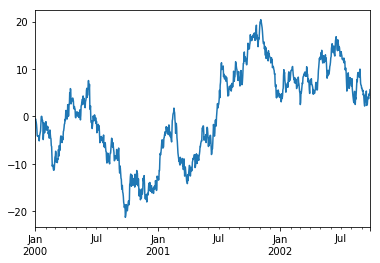

In [86]:
# Making a plot from a series
# Series.plot()

# Generate some data
ts = pd.Series(np.random.randn(1000),
                  index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()


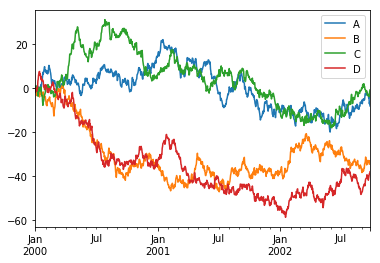

In [95]:
# Making a plot from a dataFrame
# DataFRame.plot()

# Generate a data frame of data
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                      columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
  
df.plot()

#import matplotlib.pyplot as plt
#plt.legend(loc='best')

## Getting data in and out

With pandas, you can conveniently write to and read from the following:
* csv file in the file system
* h5 file in the HDFS file system
* excel file in the file system

In [0]:
# Write to csv file
df_small = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                       "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
# Write the DataFrame df that we generate just now to a csv file
df_small.to_csv('foo.csv')

In [97]:
!cat foo.csv

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [98]:
# Note: You need to be careful about index
# writing to and reading back from CSV will turn the original index into a column
# read back from the file
pd.read_csv('foo.csv')

,Unnamed: 0,id,raw_grade
0,0,1,a
1,1,2,b
2,2,3,b
3,3,4,a
4,4,5,a
5,5,6,e


In [99]:
# Use "index_col" argument correctly can restore the index
pd.read_csv('foo.csv', index_col=0)

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [0]:
# to HDF5
df.to_hdf('foo.h5', 'df')

In [0]:
pd.read_hdf('foo.h5', 'df')

In [0]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [0]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])